### Init libraries:
- numpy: using for calculate
- matplotlib for graph

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Training function

In [ ]:
# Predict using linear function, it will return the prediction values y_hat
def predict(X, theta):
    return X.dot(theta)

# Compute loss using Mean Squared Error
def compute_loss(y, y_hat):
    loss = (y - y_hat) **2
    return loss
# Compute gradient
def compute_gradient(X, y, y_hat):
    return X.dot(y_hat - y)*2

# Update theta
def update_gradient(theta, gradient, learning_rate=0.001):
    return theta - learning_rate * gradient

### Prepare data

| Experience | Education | Salary |
|-------------|------------|--------|
| 3           | 12         | 60     |
| 4           | 13         | 55     |
| 5           | 14         | 66     |
| 6           | 15         | 93     |


In [27]:
# Experience and Education
X = np.array([[3, 12], [4, 13], [5, 14], [6, 15]])
# Salary
y = np.array([60, 55, 66, 93])

# Test data (record 2 of dataset)
X_test = np.array([[1, 4, 13]])

In [28]:
# Add bias term (intercept) to X
X_bias = np.c_[np.ones((X.shape[0], 1)), X]
print("X_bias shape:", X_bias.shape)
print("X_bias:\n", X_bias)
# Print shapes
print(f'Input shape: {X_bias.shape}')
print(f'Output shape: {y.shape}')

X_bias shape: (4, 3)
X_bias:
 [[ 1.  3. 12.]
 [ 1.  4. 13.]
 [ 1.  5. 14.]
 [ 1.  6. 15.]]
Input shape: (4, 3)
Output shape: (4,)


### Initialize parameters

In [38]:
# theta initialization theta = [bias, weight1, weight2]
theta = np.array([10, 3, 2])

### Loss before training

In [39]:
print("Initial theta:", theta)
print("y values (y):", y)
y_hat = predict(X_test, theta)
print("Predicted values (y_hat):", y_hat)
loss = compute_loss(y, y_hat)
print("Loss record 2 of sameple:", loss)

Initial theta: [10  3  2]
y values (y): [60 55 66 93]
Predicted values (y_hat): [48]
Loss record 2 of sameple: [ 144   49  324 2025]


### Train

In [40]:
epochs = 4
lr = 0.001  # Learning rate
N = len(y)
losses = []

for epoch in range(epochs):
    epoch_loss = []
    for i in range(N):
        # Take the i-th sample
        X_i = X_bias[i, :]
        y_i = y[i]

        # Predict
        y_hat = predict(X_i, theta)

        # Compute  MSE loss
        loss = compute_loss(y_i, y_hat)
        epoch_loss.append(loss)

        # Compute gradient
        gradient = compute_gradient(X_i, y_hat=y_hat, y=y_i)

        # Update theta
        theta = update_gradient(theta, gradient, lr)
    mean_loss = (np.sum(epoch_loss)) / len(epoch_loss)
    losses.append(mean_loss)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {mean_loss}, Theta: {theta}')
print("Final theta:", theta)
print("Final loss:", losses[-1])

Epoch 1/4, Loss: 234.6004982265337, Theta: [10.09833181  3.47050512  3.35549142]
Epoch 2/4, Loss: 130.86470802439834, Theta: [10.10382489  3.56374101  3.49816499]
Epoch 3/4, Loss: 138.41841820731062, Theta: [10.09861696  3.61319006  3.50074271]
Epoch 4/4, Loss: 139.08577029797195, Theta: [10.09220039  3.65739307  3.48719661]
Final theta: [10.09220039  3.65739307  3.48719661]
Final loss: 139.08577029797195


### Loss after training

In [41]:
print("Initial theta:", theta)
print("y values (y):", y)
y_hat = predict(X_test, theta)
print("Predicted values (y_hat):", y_hat)
loss = compute_loss(y, y_hat)
print("Loss record 2 of sameple:", loss)

Initial theta: [10.09220039  3.65739307  3.48719661]
y values (y): [60 55 66 93]
Predicted values (y_hat): [70.05532857]
Loss record 2 of sameple: [101.10963271 226.66291844  16.44568983 526.4579469 ]


### Loss visualization

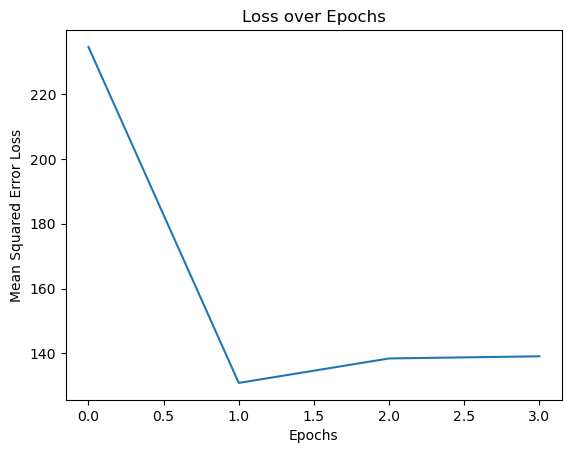

In [33]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.title('Loss over Epochs')
plt.show()

Conlusion:
The loss suddenly decreased after 1 epoch, but the test loss was still quite large, possibly because the training model was not deep enough and the data was small.